In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings

In [2]:
df = pd.read_csv("data_C.csv")
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [3]:
columns = df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]
for i in columns:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Geography: 3
['Spain' 'France' 'Germany']
Gender: 2
['Female' 'Male']
Tenure: 11
[ 4  8  5  9  1  3  2 10  7  6  0]
NumOfProducts: 4
[1 2 3 4]
HasCrCard: 2
[1 0]
IsActiveMember: 2
[1 0]


In [4]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.00000,41258.000000,4.125800e+04,41246.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,20628.50000,82629.935091,1.569218e+07,655.802890,38.165611,5.036308,55308.965471,1.556038,0.754011,0.496776,112507.486040,0.214455
std,11910.30304,47642.122777,7.136319e+04,79.736298,8.947665,2.817831,62795.530950,0.548029,0.430677,0.499996,50048.666663,0.410449
min,0.00000,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.25000,41377.500000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,20628.50000,82802.500000,1.569070e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117616.290000,0.000000
75%,30942.75000,123737.250000,1.575662e+07,710.000000,42.750000,7.000000,119785.395000,2.000000,1.000000,1.000000,154700.647500,0.000000
max,41257.00000,165032.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [6]:
df["churn"].value_counts()

churn
0    32410
1     8848
Name: count, dtype: int64

## **Splitting Dataset**

In [7]:
x = df.drop(['Unnamed: 0','id','CustomerId','Surname','churn'],axis=1)
y = df['churn']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [9]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,725.0,Spain,Female,31.0,2,0.00,2,0,0,71830.10
6996,688.0,Spain,Male,36.0,4,0.00,1,1,0,129870.93
30824,748.0,France,Female,23.0,7,118028.35,1,0,1,41626.78
40019,701.0,France,Female,45.0,5,0.00,2,1,1,158948.63
21501,590.0,France,Female,23.0,5,113923.81,3,1,0,196789.90


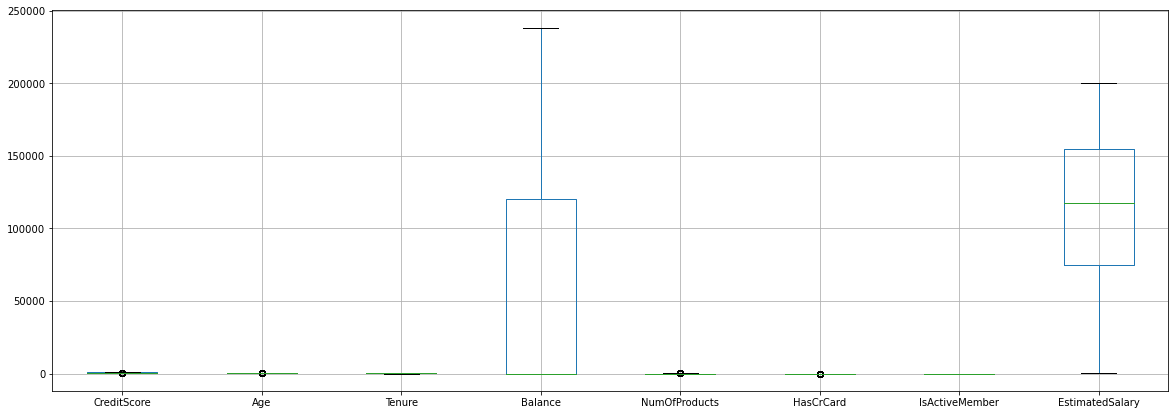

In [10]:
plt.figure(figsize=(20, 7))
x_train.boxplot()
plt.show()

In [11]:
x_train.isna().sum()

CreditScore        9
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
variable = ['CreditScore']
mean_values = x_train[variable].mean()
for i in variable:
    print(f'{i}: {mean_values[i]}')
x_train[variable] = x_train[variable].fillna(mean_values)

CreditScore: 655.7789496014789


In [13]:
variable = ['CreditScore']
mean_values = x_test[variable].mean()
for i in variable:
    print(f'{i}: {mean_values[i]}')
x_test[variable] = x_test[variable].fillna(mean_values)

CreditScore: 655.8986543823494


In [14]:
x_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [15]:
x_test.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [16]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33006 entries, 15731 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33006 non-null  float64
 1   Geography        33006 non-null  object 
 2   Gender           33006 non-null  object 
 3   Age              33006 non-null  float64
 4   Tenure           33006 non-null  int64  
 5   Balance          33006 non-null  float64
 6   NumOfProducts    33006 non-null  int64  
 7   HasCrCard        33006 non-null  int64  
 8   IsActiveMember   33006 non-null  int64  
 9   EstimatedSalary  33006 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


## **Encoding**

In [17]:
num_cols = []
cat_cols = []

for i in x_train.columns:
    if x_train[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(x_train[i].dtype) or "float" in str(x_train[i].dtype):
        num_cols.append(i)
        
print(f'Numerical Column:\n{num_cols}')
print(f'Categorical Column:\n{cat_cols}')

Numerical Column:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Column:
['Geography', 'Gender']


In [18]:
for i in cat_cols:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

Geography: 3
['Spain' 'France' 'Germany']
Gender: 2
['Female' 'Male']


In [19]:
xtrain_encode={"Gender": {"Male":1,"Female" :0}}
x_train=x_train.replace(xtrain_encode)
x_test=x_test.replace(xtrain_encode)

x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15731,725.0,Spain,0,31.0,2,0.00,2,0,0,71830.10
6996,688.0,Spain,1,36.0,4,0.00,1,1,0,129870.93
30824,748.0,France,0,23.0,7,118028.35,1,0,1,41626.78
40019,701.0,France,0,45.0,5,0.00,2,1,1,158948.63
21501,590.0,France,0,23.0,5,113923.81,3,1,0,196789.90


In [20]:
filename = 'gender_encode.pkl'
pkl.dump(xtrain_encode, open(filename, 'wb'))

In [21]:
geo_enc_train = x_train[['Geography']]
geo_enc_test = x_test[['Geography']]

train_encoded_geo = OneHotEncoder()

geo_enc_train = pd.DataFrame(train_encoded_geo.fit_transform(geo_enc_train).toarray(),columns=train_encoded_geo.get_feature_names_out())
geo_enc_test = pd.DataFrame(train_encoded_geo.transform(geo_enc_test).toarray(),columns=train_encoded_geo.get_feature_names_out())

x_train=x_train.reset_index()
x_test=x_test.reset_index()

x_train_enc=pd.concat([x_train,geo_enc_train], axis=1)
x_test_enc=pd.concat([x_test,geo_enc_test], axis=1)

In [22]:
filename_subs = 'oneHot_encode_geo.pkl'
pkl.dump(train_encoded_geo, open(filename_subs, 'wb'))

In [23]:
x_train_enc.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,15731,725.0,Spain,0,31.0,2,0.00,2,0,0,71830.10,0.0,0.0,1.0
1,6996,688.0,Spain,1,36.0,4,0.00,1,1,0,129870.93,0.0,0.0,1.0
2,30824,748.0,France,0,23.0,7,118028.35,1,0,1,41626.78,1.0,0.0,0.0
3,40019,701.0,France,0,45.0,5,0.00,2,1,1,158948.63,1.0,0.0,0.0
4,21501,590.0,France,0,23.0,5,113923.81,3,1,0,196789.90,1.0,0.0,0.0


In [24]:
x_train_enc= x_train_enc.drop(['index','Geography'],axis=1)
x_test_enc = x_test_enc.drop(['index','Geography'],axis=1)

x_train_enc.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,725.0,0,31.0,2,0.00,2,0,0,71830.10,0.0,0.0,1.0
1,688.0,1,36.0,4,0.00,1,1,0,129870.93,0.0,0.0,1.0
2,748.0,0,23.0,7,118028.35,1,0,1,41626.78,1.0,0.0,0.0
3,701.0,0,45.0,5,0.00,2,1,1,158948.63,1.0,0.0,0.0
4,590.0,0,23.0,5,113923.81,3,1,0,196789.90,1.0,0.0,0.0


## **Model RF**

In [25]:
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

In [26]:
y_predict = RF_class.predict(x_test_enc)

print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.84      0.98      0.90      6431
           0       0.83      0.32      0.46      1821

    accuracy                           0.83      8252
   macro avg       0.83      0.65      0.68      8252
weighted avg       0.83      0.83      0.80      8252



In [27]:
XGB_model = xgb.XGBClassifier(random_state = 42)
XGB_model.fit(x_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [28]:
y_predict = XGB_model.predict(x_test_enc)

print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.89      0.94      0.91      6431
           0       0.74      0.58      0.65      1821

    accuracy                           0.86      8252
   macro avg       0.81      0.76      0.78      8252
weighted avg       0.86      0.86      0.86      8252



In [29]:
# Ambil Model Terbaik
filename = 'XGB_churn.pkl'
pkl.dump(XGB_model, open(filename, 'wb'))